In [13]:
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st
from sqlalchemy import create_engine, text

In [14]:
basketball_path = Path("Resources/nba_db.db")

In [15]:
engine = create_engine(f"sqlite:///{basketball_path}")
conn = engine.connect()

In [16]:
basketball_data = pd.read_sql("select * from Basketball", conn)
basketball_data.head()

,id,rk,player,pos,age,tm,g,gs,mp,fg,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
0,0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [17]:
basketball_df = basketball_data.rename(columns={
    "rk": "rank",
    "pos": "position",
    "tm": "team",
    "g": "games played",
    "gs": "games scored",
    "mp": "avg minutes played",
    "fg": "avg field goals made",
    "fga": "avg field goals attempted",
    "fg%": "field goal made %",
    "3p": "avg three-point shots made",
    "3pa": "avg three-point shots attempted",
    "3p%": "three-point shots made %",
    "2p": "avg two-point shots made",
    "2pa": "avg two-point shots attempted",
    "2p%": "two-point shots made %",   
    "efg%": "effective goal %",
    "ft": "avg free-throw shots made",
    "fta": "avg free-throw shots attempted",
    "ft%": "free-throw shots made %",
    "orb": "avg offensive rebounds",
    "drb": "avg defensive rebounds",
    "trb": "avg total rebounds",
    "ast": "avg assists",
    "stl": "avg steals",
    "blk": "avg blocks",
    "tov": "avg turnovers",
    "pf": "avg personal fouls",
    "pts": "avg points scored"
})
basketball_df.head()

,id,rank,player,position,age,team,games played,games scored,avg minutes played,avg field goals made,...,avg offensive rebounds,avg defensive rebounds,avg total rebounds,avg assists,avg steals,avg blocks,avg turnovers,avg personal fouls,avg points scored,year
0,0,1,Mahmoud Abdul-Rauf,PG,28,SAC,31,0,17.1,3.3,...,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3,1997-1998
1,1,2,Tariq Abdul-Wahad,SG,23,SAC,59,16,16.3,2.4,...,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4,1997-1998
2,2,3,Shareef Abdur-Rahim,SF,21,VAN,82,82,36.0,8.0,...,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3,1997-1998
3,3,4,Cory Alexander,PG,24,TOT,60,22,21.6,2.9,...,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1,1997-1998
4,4,4,Cory Alexander,PG,24,SAS,37,3,13.5,1.6,...,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5,1997-1998


In [18]:
# aggressiveness of players (fouls vs rebound) (blocks vs rebounds); group by position or age

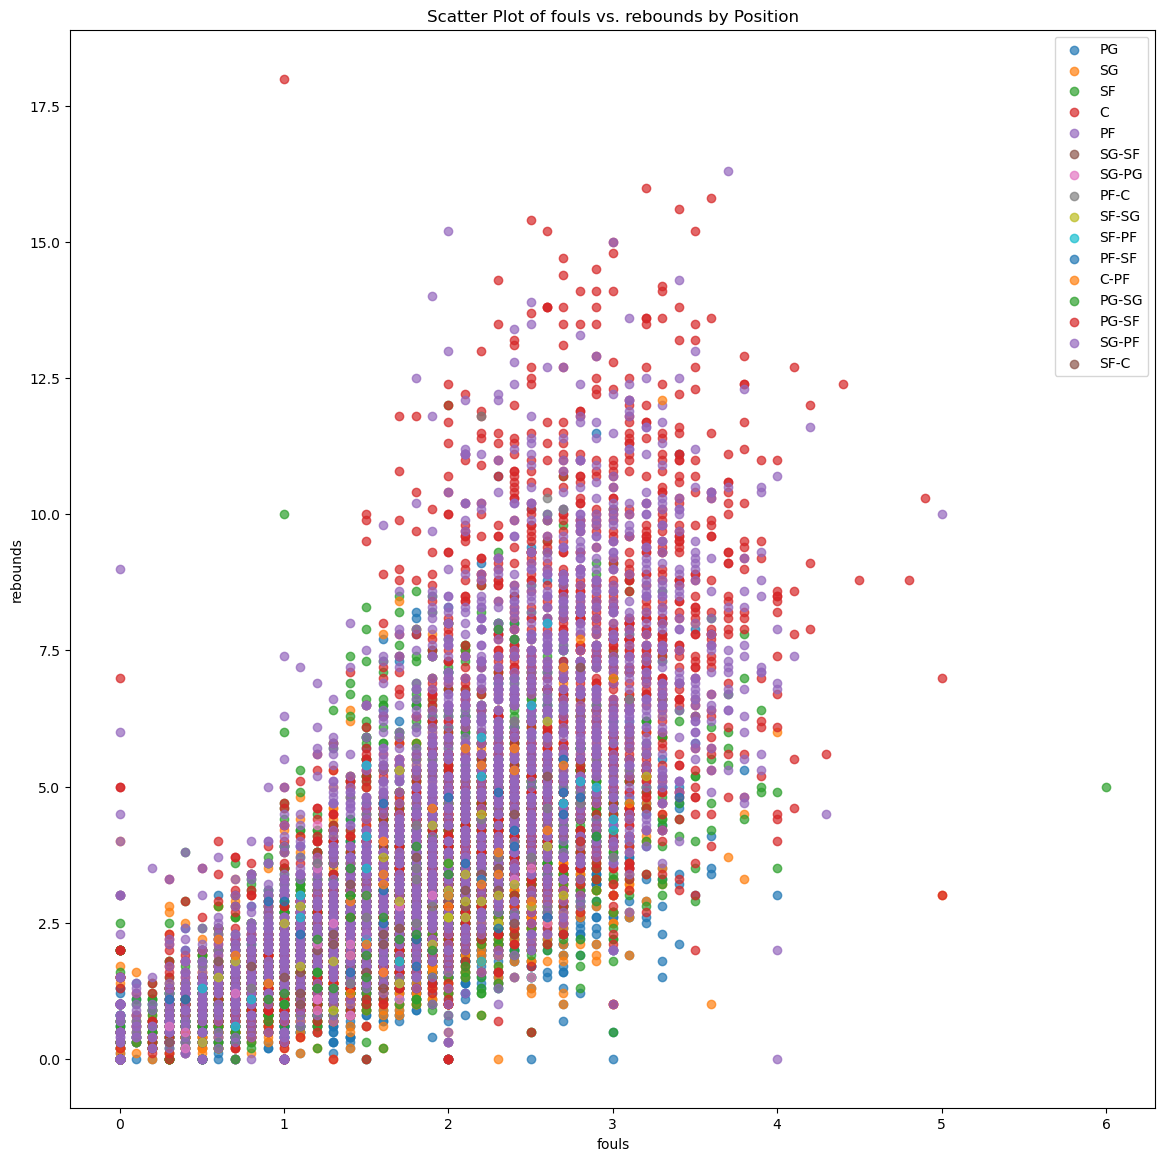

In [36]:
plt.figure(figsize=(14, 14))

for position in basketball_df["position"].unique():
    position_data = basketball_df[basketball_df["position"] == position]
    plt.scatter(position_data["avg personal fouls"], position_data["avg total rebounds"], label = position, alpha=0.7)

plt.title('Scatter Plot of fouls vs. rebounds by Position')
plt.xlabel('fouls')
plt.ylabel('rebounds')
plt.legend()
plt.show()

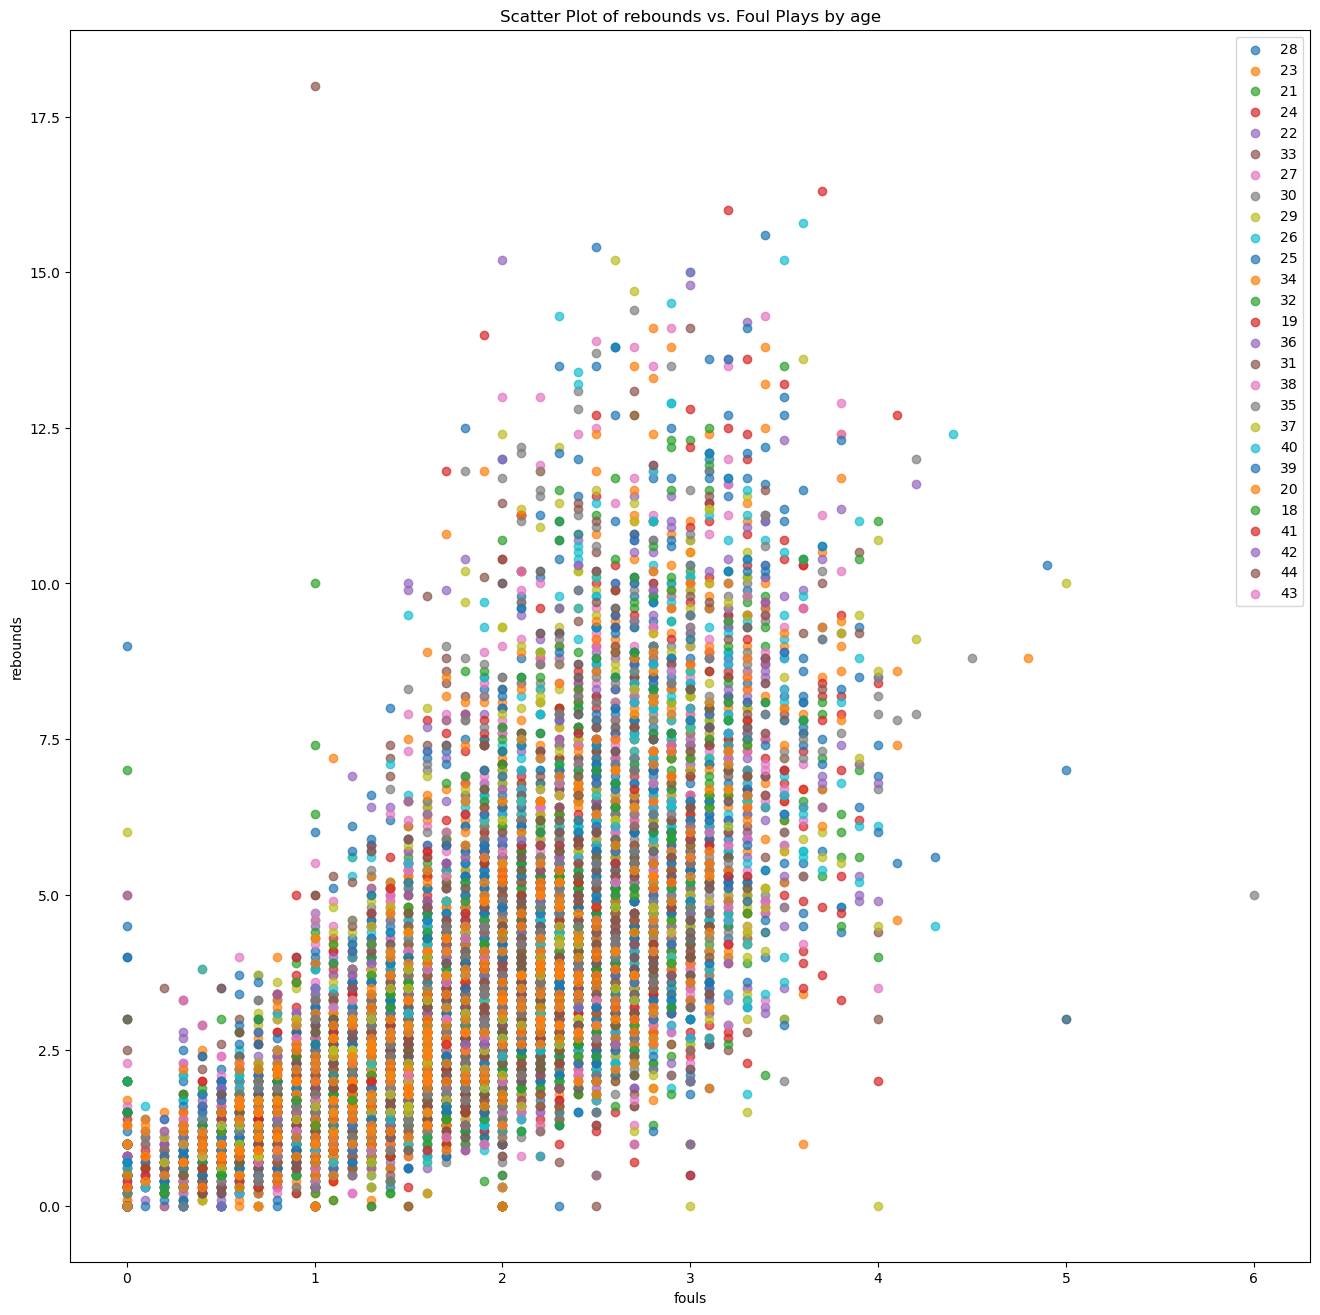

In [35]:
plt.figure(figsize=(16, 16))

for age in basketball_df["age"].unique():
    age_data = basketball_df[basketball_df["age"] == age]
    plt.scatter(age_data["avg personal fouls"], age_data["avg total rebounds"], label = age, alpha=0.7)

plt.title('Scatter Plot of rebounds vs. Foul Plays by age')
plt.xlabel('fouls')
plt.ylabel('rebounds')
plt.legend()
plt.show()

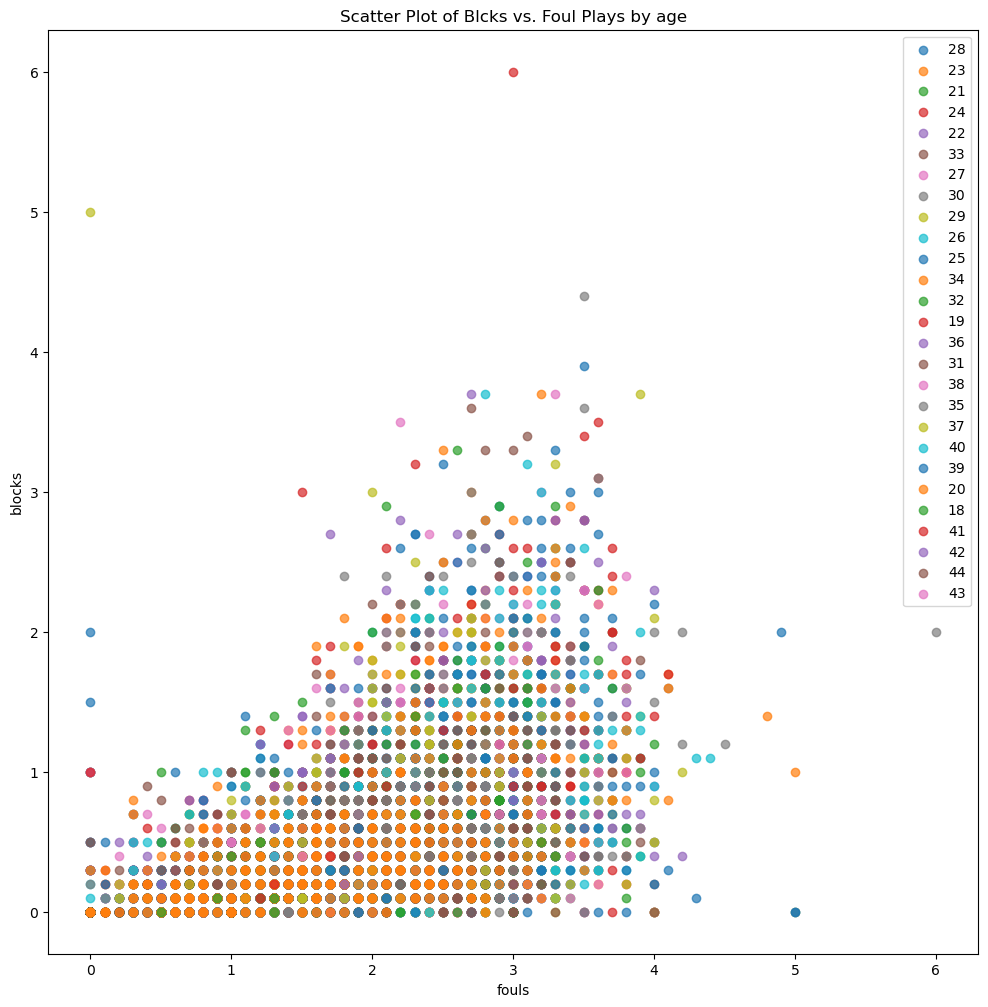

In [41]:
plt.figure(figsize=(12, 12))

for age in basketball_df["age"].unique():
    age_data = basketball_df[basketball_df["age"] == age]
    plt.scatter(age_data["avg personal fouls"], age_data["avg blocks"], label = age, alpha=0.7)

plt.title('Scatter Plot of Blcks vs. Foul Plays by age')
plt.xlabel('fouls')
plt.ylabel('blocks')
plt.legend()
plt.show()

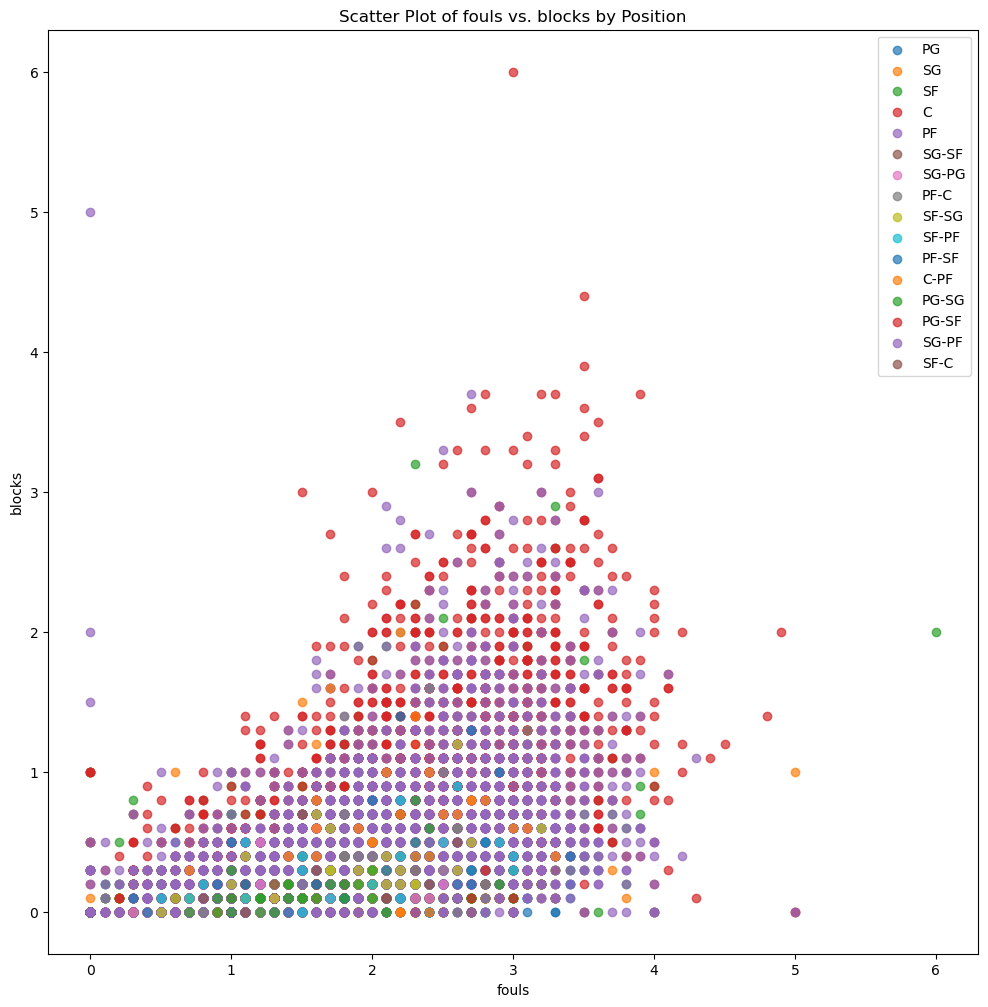

In [42]:
plt.figure(figsize=(12, 12))

for position in basketball_df["position"].unique():
    position_data = basketball_df[basketball_df["position"] == position]
    plt.scatter(position_data["avg personal fouls"], position_data["avg blocks"], label = position, alpha = 0.7)

plt.title('Scatter Plot of fouls vs. blocks by Position')
plt.xlabel('fouls')
plt.ylabel('blocks')
plt.legend()
plt.show()